# Classical Methods

In [1]:
# imports
%matplotlib inline  
import numpy as np
import numpy.random as rng

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
import matplotlib.pyplot as plt

This exercise sheet is split in two parts.
- The first part is about regression and regularization on toy data.
- The second part is about disease classification on a medical dataset.

## 1) Regression and Regularization

### Task 1.1

Your task is to implement different regression models. Please use the functions in the following cells to implement

- Linear Regression
- Ridge Regression
- Polynomial Regression
- Polynomial Ridge Regression

You can assume the input data to have the following shapes

- X: (num_features, num_samples)
- y: (num_targets, num_samples)

Your output should be the weight vector ```w``` have the following shape

- w: (num_features, 1)

Hint for polynomial regression: think about how you can reduce polynomial regression to linear regression. You may use the previously implemented functions.

In [2]:
def linear_regression(X, y):
    # START YOUR CODE
    return np.linalg.inv(X.dot(X.T)).dot(X).dot(y.T)
    # END YOUR CODE

In [3]:
def ridge_regression(X, y, lam):
    # START YOUR CODE
    return np.linalg.inv(X.dot(X.T) + lam*np.eye(len(X))).dot(X.dot(y.T))
    # END YOUR CODE

In [4]:
def polynomial_regression(X, y, m):
    # START YOUR CODE
    Xs = []
    for mc in np.arange(m+1):
        Xs.append(X**mc)
    Xs = np.vstack(Xs)
    return linear_regression(Xs, y)
    # END YOUR CODE

In [5]:
def polynomial_ridge_regression(X, y, m, lam):
    # START YOUR CODE
    Xs = []
    for mc in np.arange(m+1):
        Xs.append(X**mc)
    Xs = np.vstack(Xs)
    return ridge_regression(Xs, y, lam)
    # END YOUR CODE

### Generate data sets

Here, we generate 4 artifical datasets to apply your models to.

In [6]:
X1 = np.array(np.linspace(-3,3,100).reshape(1,100))
y1 = 3*X1 + 1*rng.randn(100)

X2 = np.array(np.linspace(-20,20, 500).reshape(1,500))
y2 = (5 * (X2)**2) + 200*np.sin(X2) + 100*rng.randn(500)

X3 = np.array(np.linspace(0,np.pi*4,200).reshape(1,200))
y3 = 10*np.sin(X3) + 5*rng.randn(200) + 3*X3

X4 = np.linspace(0,4,200).reshape(1,200)
y4 = -30*X4 + 5*rng.randn(200)

num_outlier = 30
outlier4 = np.linspace(4,4.2, num_outlier).reshape(1,num_outlier)
X4 = np.hstack([X4, outlier4])
y4 = np.hstack([y4, outlier4+ rng.randn(num_outlier)])

data_sets = [(X1, y1), (X2, y2), (X3, y3), (X4, y4)]

### Task 1.2

Please apply the linear regression model on all data sets in `data_sets` and visualize the results by
-  plot the data as points
-  plot the regressed line.

What happens if you apply ridge regression with different lambdas instead?

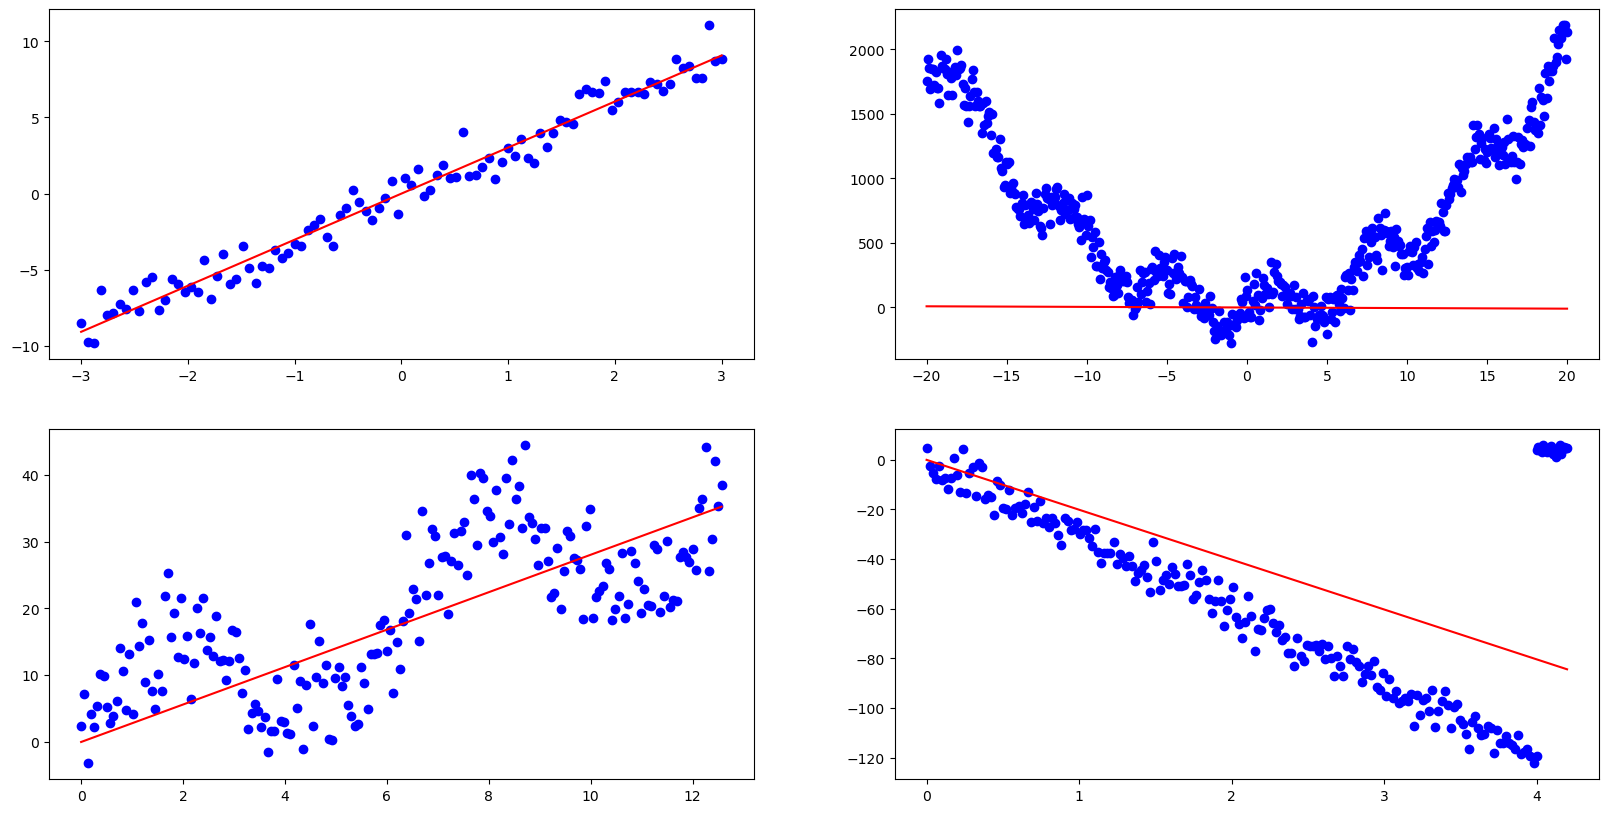

In [7]:
_, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

axes =[ax1, ax2, ax3, ax4]
                                         
for idata_set, data_set in enumerate(data_sets):
    X,y = data_set
    # START YOUR CODE
    w_hat = linear_regression(X, y)
    y_hat = w_hat.T.dot(X).T
    # END YOUR CODE
    axes[idata_set].plot(X.T, y.T, "o", c="b")
    axes[idata_set].plot(X.T, y_hat, c="r")


### Task 1.3

Please apply polynomial regression on the second data set with varying polynomial degree `D` and interpret the solution. Write your predictions to ```y_hat```.

/var/folders/ny/rr67qwgs6p589v44vc65cj440000gn/T/ipykernel_6338/4106401931.py:30: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  _ = plt.colorbar(CS3)


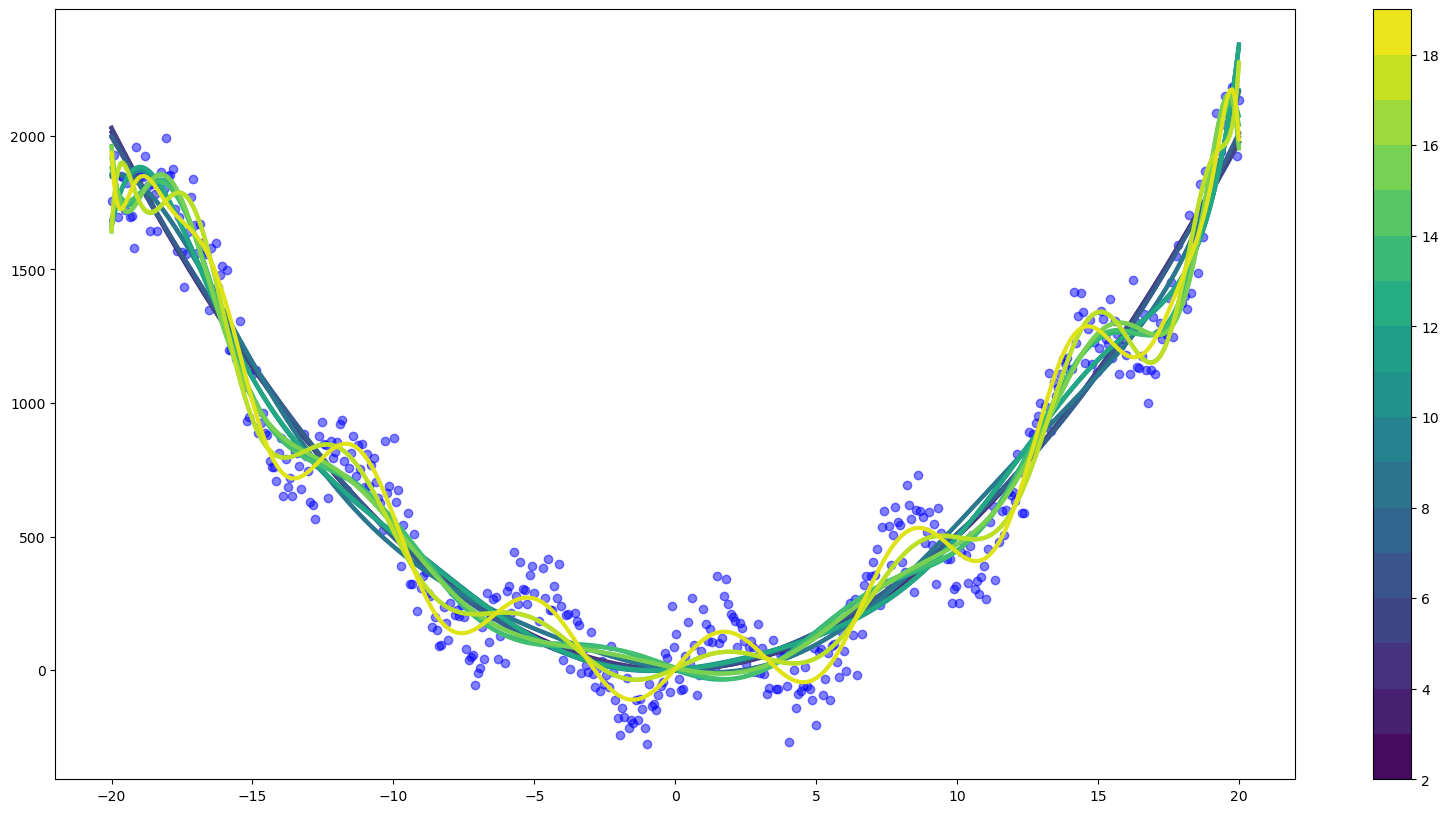

In [8]:
X,y = data_sets[1]
Ds = np.arange(2,20,1)
colors = plt.cm.viridis(Ds/(Ds.max()+1))

y_hats = []

# START YOUR CODE
for D in Ds:

    w_hat = polynomial_regression(X,y, D)

    Xs = []
    for mc in np.arange(D+1):
        Xs.append(X**mc)
    Xs = np.vstack(Xs)

    y_hats.append(w_hat.T.dot(Xs).T)
# END YOUR CODE

Z = [[0,0],[0,0]]
CS3 = plt.contourf(Z, Ds, cmap=plt.cm.viridis)
plt.clf()


    
plt.plot(X.T, y.T, "o", c="b", alpha=.5)
for iline,line in enumerate(y_hats):
    plt.plot(X.T, line, c=colors[iline], alpha=1, linewidth=3)

_ = plt.colorbar(CS3)

### Task 1.4

Please apply polynomial ridge regression on the third data set with varying $\lambda$ and interpret the solution. Write your predictions to ```y_hat```.

/var/folders/ny/rr67qwgs6p589v44vc65cj440000gn/T/ipykernel_6338/4105596446.py:33: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  _ = plt.colorbar(CS3)


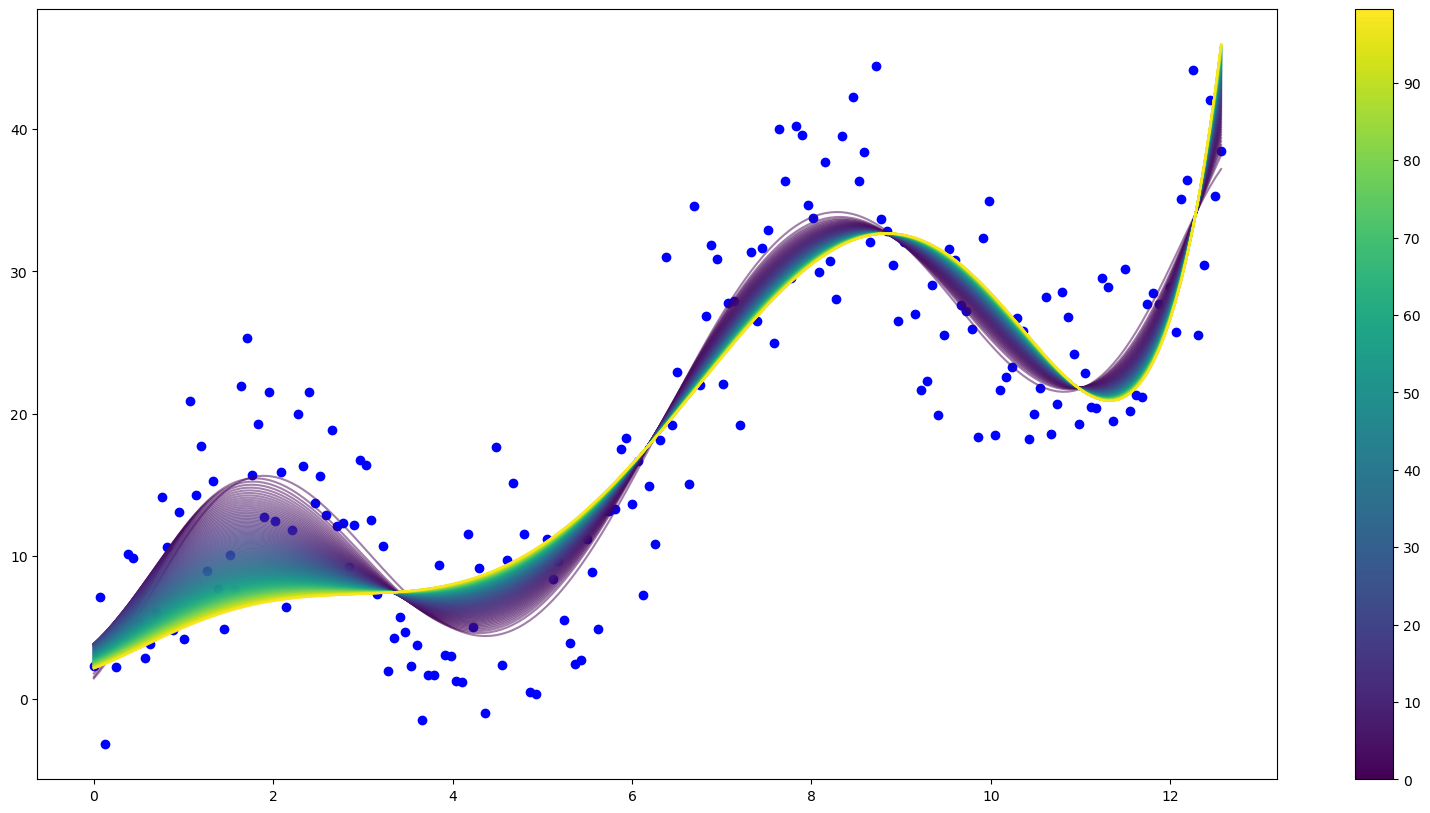

In [9]:
import matplotlib.colors as clr
D = 7


X,y = data_sets[2]
lams = np.arange(0, 100, .5)

colors = plt.cm.viridis(lams/100)

y_hat = []

# START YOUR CODE
for lam in lams:    
    
    w_hat = polynomial_ridge_regression(X, y, D, lam)

    Xs = []
    for mc in np.arange(D+1):
        Xs.append(X**mc)
    Xs = np.vstack(Xs)

    y_hat.append(w_hat.T.dot(Xs).T)
# END YOUR CODE

Z = [[0,0],[0,0]]
CS3 = plt.contourf(Z, lams, cmap=plt.cm.viridis)
plt.clf()
    
plt.plot(X.T, y.T, "o", c="b")
for iline,line in enumerate(y_hat):
    plt.plot(X.T, line, c=colors[iline], alpha=.5)

_ = plt.colorbar(CS3)

## 2) Classification: Heart Disease

We will train classical ML models for classification on the publicly available "Heart Disease Dataset". A description of the dataset can be found here:

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

We are trying to predict if a patient has a heart disease (0 = no disease and 1 = disease) from the 13 available features.

Instead of implementing methods ourselves, we use the popular ```scikit-learn``` package.

### Data preparation

Reading the data. Notice that the shape of the data is (num_samples, num_features).

In [10]:
import pandas as pd

dataset = pd.read_csv("heart.csv")
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

print("Data shape:\t", X.shape)
print("Label shape:\t", y.shape)

Data shape:	 (1025, 13)
Label shape:	 (1025,)


Splitting the data into train and test set.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print('Number of train samples:\t', len(X_train))
print('Number of test samples: \t', len(X_test))

Number of train samples:	 820
Number of test samples: 	 205


Normalizing the data.

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print('Scaled average mean:\t', X_train.mean(axis=0).mean())
print('Scaled average std:\t', X_train.std(axis=0).mean())

Scaled average mean:	 -5.98541437384688e-17
Scaled average std:	 1.000000000000001


### Task 2.1

Please train a logistic regression model on the train data, and evaluate it's performance on the train and test data.

You may use the sklearn implementation of the logistic regression model. The documentation can be found here: 

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

You may also use the evaluation code provided below. For that, store your predictions in variables named ```y_train_pred``` and ```y_test_pred```.

In [13]:
from sklearn.linear_model import LogisticRegression

# START YOUR CODE
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# END YOUR CODE

In [14]:
from sklearn.metrics import accuracy_score

print('Train accuracy:\t', accuracy_score(y_train, y_train_pred))
print('Test accuracy:\t', accuracy_score(y_test, y_test_pred))

Train accuracy:	 0.8585365853658536
Test accuracy:	 0.8634146341463415


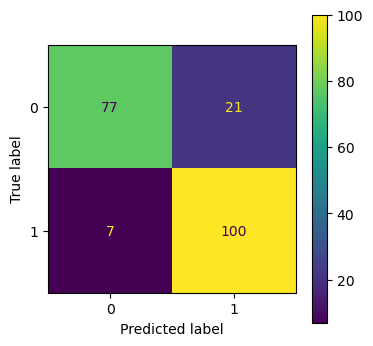

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)

### Task 2.2

See if you can find a better classifier for these data. What accruacy score can you reach? You may use any classifier implemented in the sklearn package.

In [16]:
# START YOUR CODE
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# END YOUR CODE

In [17]:
print('train accuracy:\t', accuracy_score(y_train, y_train_pred))
print('test accuracy:\t', accuracy_score(y_test, y_test_pred))

train accuracy:	 0.948780487804878
test accuracy:	 0.9658536585365853


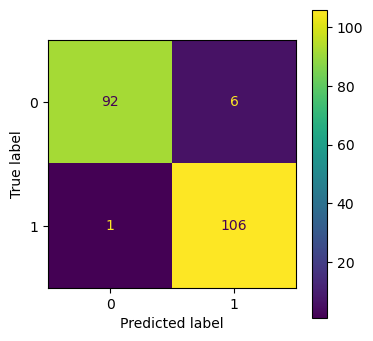

In [18]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax)